In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def blwn(fmin,fmax,bwp,loc):  # bwp : band width percentage # loc : location percentage
    df = (fmax-fmin)*bwp;
    f1 = fmin + loc*(fmax-fmin-df);
    f2 = f1+df;
    A = (100**2) / (f2-f1)    # grms = 100
    freq = np.array([f1,f2]);
    psd = np.array([A,A]);
    return freq,psd;

In [3]:
def unimodal(fmin,fmax,bwp,loc,fn1,zeta1):
    df = (fmax-fmin)*bwp;
    f1 = fmin + loc*(fmax-fmin-df);
    f2 = f1+df;
    f = np.linspace(f1,f2,5000);
    A = fn1**4 + (2*zeta1*f*fn1)**2;
    B = (fn1**2-f**2)**2 + (2*zeta1*f*fn1)**2;
    out = A/B;
    grms_tmp = np.sqrt(np.trapz(out,f));
    out *= (10/grms_tmp)**2             # grms = 10
    return f, out;

In [4]:
def band_split(fi,pi,nb): # fi : interpolated freq, ai : interpolated psd, nb : # of bands
    ni = len(fi);
    grms = np.sqrt(np.trapz(pi,fi))
    goal = grms/np.sqrt(nb);  # target grms
    idx = np.zeros(nb+1,'int');
    grms_tmp = 0;
    for i in range(1,nb):
        while(grms_tmp < goal):
            idx[i] += 1;
            grms_tmp = np.sqrt(np.trapz(pi[idx[i-1]:idx[i]],fi[idx[i-1]:idx[i]]));
        grms_tmp1 = np.sqrt(np.trapz(pi[idx[i-1]:idx[i]-1],fi[idx[i-1]:idx[i]-1]));
        if np.abs(grms_tmp1 - goal) < np.abs(grms_tmp - goal):
            idx[i] += 1;
        grms_tmp = 0; grms_tmp1 = 0;
    idx[0] = 0; idx[nb] = len(pi);
    dfi = []; dpi = [];
    for i in range(nb):
        dfi.append(fi[idx[i]:idx[i+1]+1]); dpi.append(pi[idx[i]:idx[i+1]+1]);
    return dfi,dpi

In [5]:
def log_interp(x,x_spec,y_spec):
    return 10**np.interp(np.log10(x),np.log10(x_spec),np.log10(y_spec));

In [6]:
fmin = 1; fmax = 5000; bwp = 1; loc = 0;
freq,psd = blwn(fmin,fmax,bwp,loc);
fi = np.linspace(fmin,fmax,50000);
pi = log_interp(fi,freq,psd);
nb = 2;
dfi,dpi = band_split(fi,pi,nb);

freq range : 1.00 Hz ~ 2500.65 Hz, grms1 = 70.7128
freq range : 2500.65 Hz ~ 5000.00 Hz, grms2 = 70.7086


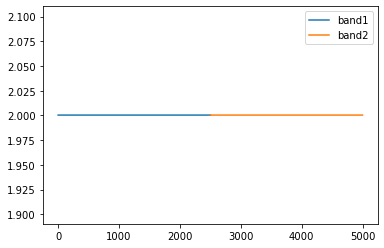

In [7]:
for i in range(nb):
    plt.plot(dfi[i],dpi[i],label='band%d'%(i+1));
    plt.legend();
    print('freq range : %.2f Hz ~ %.2f Hz, grms%d = %.4f'%(min(dfi[i]),max(dfi[i]),i+1,np.sqrt(np.trapz(dpi[i],dfi[i]))));

In [8]:
fmin = 1; fmax = 5000; bwp = 1; loc = 0;
freq,psd = blwn(fmin,fmax,bwp,loc);
fi = np.linspace(fmin,fmax,50000);
pi = log_interp(fi,freq,psd);
nb = 3;
dfi,dpi = band_split(fi,pi,nb);

freq range : 1.00 Hz ~ 1667.60 Hz, grms1 = 57.7396
freq range : 1667.60 Hz ~ 3334.20 Hz, grms2 = 57.7396
freq range : 3334.20 Hz ~ 5000.00 Hz, grms3 = 57.7258


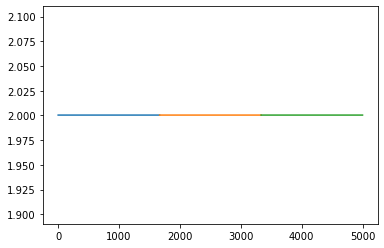

In [9]:
for i in range(nb):
    plt.plot(dfi[i],dpi[i],label='band%d'%(i+1));
    print('freq range : %.2f Hz ~ %.2f Hz, grms%d = %.4f'%(min(dfi[i]),max(dfi[i]),i+1,np.sqrt(np.trapz(dpi[i],dfi[i]))));

In [10]:
fmin = 1; fmax = 5000; bwp = 1; loc = 0; fn1 = 3000; zeta1 = 0.1;
freq,psd = unimodal(fmin,fmax,bwp,loc,fn1,zeta1);
fi = np.linspace(fmin,fmax,50000);
pi = log_interp(fi,freq,psd);
nb = 2;
dfi,dpi = band_split(fi,pi,nb);

freq range : 1.00 Hz ~ 2908.08 Hz, grms1 = 7.0731
freq range : 2908.08 Hz ~ 5000.00 Hz, grms2 = 7.0690


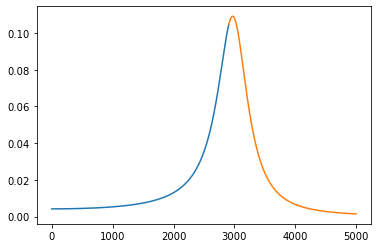

In [11]:
for i in range(nb):
    plt.plot(dfi[i],dpi[i],label='band%d'%(i+1));
    print('freq range : %.2f Hz ~ %.2f Hz, grms%d = %.4f'%(min(dfi[i]),max(dfi[i]),i+1,np.sqrt(np.trapz(dpi[i],dfi[i]))));

In [12]:
fmin = 1; fmax = 5000; bwp = 1; loc = 0; fn1 = 3000; zeta1 = 0.1;
freq,psd = unimodal(fmin,fmax,bwp,loc,fn1,zeta1);
fi = np.linspace(fmin,fmax,50000);
pi = log_interp(fi,freq,psd);
nb = 3;
dfi,dpi = band_split(fi,pi,nb);

freq range : 1.00 Hz ~ 2713.41 Hz, grms1 = 5.7743
freq range : 2713.41 Hz ~ 3064.65 Hz, grms2 = 5.7758
freq range : 3064.65 Hz ~ 5000.00 Hz, grms3 = 5.7704


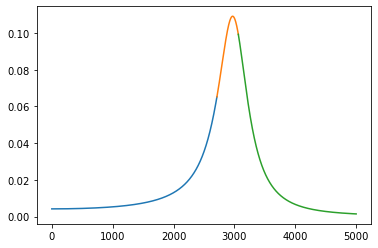

In [13]:
for i in range(nb):
    plt.plot(dfi[i],dpi[i],label='band%d'%(i+1));
    print('freq range : %.2f Hz ~ %.2f Hz, grms%d = %.4f'%(min(dfi[i]),max(dfi[i]),i+1,np.sqrt(np.trapz(dpi[i],dfi[i]))));